In [20]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Global variables
name = "Michał"
surname = "Święciło"
F = len(name)
L = len(surname)

## Excercise 1 -  Generated Quantities Block

In [21]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,25.7265,34.0,31.0,22.0,35.0,25.0,22.0
1,0.0,0.0,44.0499,35.0,43.0,44.0,39.0,56.0,40.0
2,0.0,0.0,107.2940,97.0,122.0,103.0,110.0,110.0,91.0
3,0.0,0.0,24.5840,30.0,23.0,18.0,28.0,23.0,25.0
4,0.0,0.0,188.4700,176.0,186.0,181.0,173.0,185.0,191.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,177.6550,186.0,180.0,186.0,174.0,187.0,182.0
996,0.0,0.0,146.7830,137.0,155.0,139.0,146.0,145.0,149.0
997,0.0,0.0,70.6475,71.0,59.0,80.0,65.0,86.0,71.0
998,0.0,0.0,126.6420,140.0,119.0,123.0,116.0,128.0,129.0


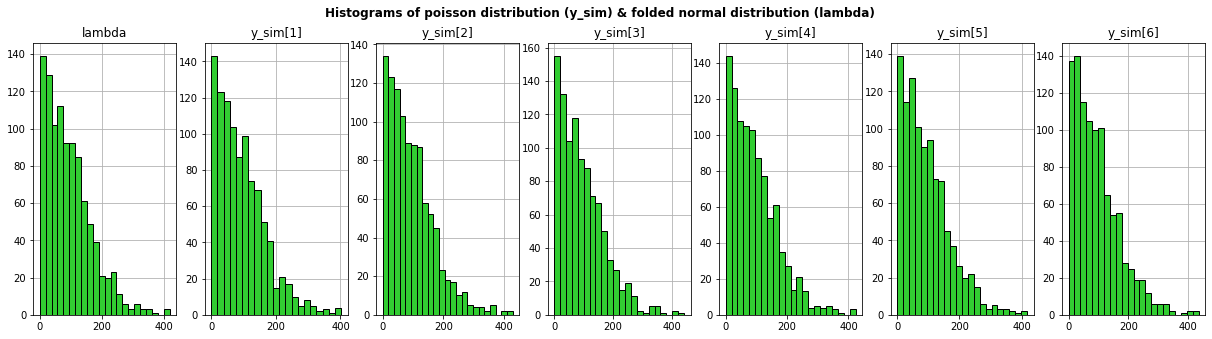

In [48]:
# Compilation of code_1.stan using M=F
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

# Creation of pandas dataframe from resulting draws
df = samples.draws_pd()
display(df)

# Histogram for each of y_sim and lambda
fig, axs = plt.subplots(nrows=1, ncols=F+1, figsize=((F+1)*3, 5))
fig.suptitle('Histograms of poisson distribution (y_sim) & folded normal distribution (lambda)', fontweight="bold")

for i, data_title in enumerate(list(df.columns)[2:]):
    axs[i].hist(df[data_title], bins='auto', color='limegreen', edgecolor="black", zorder=3)
    axs[i].set_title(data_title)
    axs[i].grid(zorder=0)

plt.show()

## Excercise 2 - Constraints on the data 

In [62]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

# Creation of pandas dataframe from resulting draws
df = samp_bern1.draws_pd()
display(df)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-2.92677,0.956638,0.922863,1.0,3.0,0.0,3.03474,0.636191
1,-3.65749,0.921997,0.922863,2.0,3.0,0.0,3.66709,0.201027
2,-4.57459,0.956458,0.922863,2.0,3.0,0.0,4.59126,0.114696
3,-4.37912,1.000000,0.922863,1.0,1.0,0.0,4.78928,0.128471
4,-5.51623,0.890577,0.922863,1.0,1.0,0.0,5.54601,0.068041
...,...,...,...,...,...,...,...,...
3995,-2.96219,0.890027,0.951052,2.0,3.0,0.0,3.43420,0.650373
3996,-3.15599,0.848671,0.951052,2.0,3.0,0.0,3.84024,0.708833
3997,-2.94168,1.000000,0.951052,1.0,1.0,0.0,3.11729,0.642366
3998,-3.79658,0.809525,0.951052,1.0,3.0,0.0,3.79752,0.816505


In [69]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

# Creation of pandas dataframe from resulting draws
df = samp_bern1.draws_pd()
display(df)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-2.92677,0.956638,0.922863,1.0,3.0,0.0,3.03474,0.636191
1,-3.65749,0.921997,0.922863,2.0,3.0,0.0,3.66709,0.201027
2,-4.57459,0.956458,0.922863,2.0,3.0,0.0,4.59126,0.114696
3,-4.37912,1.000000,0.922863,1.0,1.0,0.0,4.78928,0.128471
4,-5.51623,0.890577,0.922863,1.0,1.0,0.0,5.54601,0.068041
...,...,...,...,...,...,...,...,...
3995,-2.96219,0.890027,0.951052,2.0,3.0,0.0,3.43420,0.650373
3996,-3.15599,0.848671,0.951052,2.0,3.0,0.0,3.84024,0.708833
3997,-2.94168,1.000000,0.951052,1.0,1.0,0.0,3.11729,0.642366
3998,-3.79658,0.809525,0.951052,1.0,3.0,0.0,3.79752,0.816505


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [70]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▏         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)
chain 1 |██▌       | 00:00 Iteration: 1500 / 7000 [ 21%]  (Sampling)


chain 1 |██▉       | 00:00 Iteration: 1800 / 7000 [ 25%]  (Sampling)


chain 1 |███▎      | 00:01 Iteration: 2100 / 7000 [ 30%]  (Sampling)




chain 1 |███▊      | 00:01 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▎     | 00:02 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |████▌     | 00:02 Iteration: 3000 / 7000 [ 42%]  (Sampling)


chain 1 |████▋     | 00:02 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |████▊     | 00:02 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |█████▏    | 00:03 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▎    | 00:03 Iteration: 3500 / 7000 [ 


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab2 - Introduction to Stan/samples/code_4-20230318195354_1.csv, /home/Lab2 - Introduction to Stan/samples/code_4-20230318195354_2.csv, /home/Lab2 - Introduction to Stan/samples/code_4-20230318195354_3.csv, /home/Lab2 - Introduction to Stan/samples/code_4-20230318195354_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

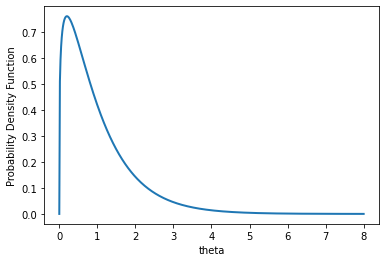

In [71]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [72]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█         | 00:00 Iteration:  600 / 7000 [  8%]  (Warmup)


chain 1 |██▏       | 00:00 Iteration: 1300 / 7000 [ 18%]  (Sampling)


chain 1 |███▌      | 00:01 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▍     | 00:01 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |████▋     | 00:01 Iteration: 3100 / 7000 [ 44%]  (Sampling)

chain 1 |█████     | 00:01 Iteration: 3300 / 7000 [ 47%]  (Sampling)


chain 1 |█████▎    | 00:02 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▌    | 00:02 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |█████▊    | 00:02 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████    | 00:02 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▍   | 00:02 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▋   | 0


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab2 - Introduction to Stan/samples/code_5-20230318195402_1.csv, /home/Lab2 - Introduction to Stan/samples/code_5-20230318195402_2.csv, /home/Lab2 - Introduction to Stan/samples/code_5-20230318195402_3.csv, /home/Lab2 - Introduction to Stan/samples/code_5-20230318195402_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

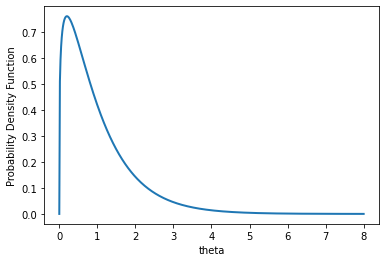

In [73]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [74]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = # number of letters in the first name
L = # number of letters in the last name
y0 = # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

SyntaxError: invalid syntax (2850169273.py, line 3)

## Excercise 5 - different methods of defining models


In [ ]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target(data=data,seed=seed)
result_3 = model_log_target_ind(data=data,seed=seed)



In [ ]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [ ]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = )
# investigate the output and plot histogram of mean_y variable